## Comparison of lunar Earth data sets

In [24]:
from obspy import read
import os

def get_mseed_duration(mseed_file):
    st = read(mseed_file)
    tr = st[0]
    start_time = tr.stats.starttime
    end_time = tr.stats.endtime
    duration = end_time - start_time
    return duration, start_time, end_time

def compare_mseed_durations(file1, file2):
    duration1, start_time1, end_time1 = get_mseed_duration(file1)
    duration2, start_time2, end_time2 = get_mseed_duration(file2)
    
    file1_name = os.path.basename(file1)
    file2_name = os.path.basename(file2)
    
    print("earth_TW")
    print(f"File 1: {file1_name}")
    print(f"  Start time: {start_time1}")
    print(f"  End time: {end_time1}")
    print(f"  Duration: {duration1:.2f} seconds\n")
   
    print("lunar")
    print(f"File 2: {file2_name}")
    print(f"  Start time: {start_time2}")
    print(f"  End time: {end_time2}")
    print(f"  Duration: {duration2:.2f} seconds\n")
    
    if duration1 > duration2:
        print(f"{file1_name} is longer by {duration1 - duration2:.2f} seconds.")
    elif duration1 < duration2:
        print(f"{file2_name} is longer by {duration2 - duration1:.2f} seconds.")
    else:
        print("Both files have the same duration.")

if __name__ == "__main__":
    mseed_file1 = 'D:\\NASA\\space_apps_2024_seismic_detection\\data\\mars\\training\\data\\XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed'
    mseed_file2 = 'D:\\NASA\\space_apps_2024_seismic_detection\\data\\lunar\\training\\data\\S12_GradeA\\xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed'
    
    compare_mseed_durations(mseed_file1, mseed_file2)


earth_TW
File 1: XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed
  Start time: 2022-02-03T08:00:00.009000Z
  End time: 2022-02-03T08:59:59.959000Z
  Duration: 3599.95 seconds

lunar
File 2: xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed
  Start time: 1970-01-19T00:00:00.665000Z
  End time: 1970-01-20T00:00:02.778208Z
  Duration: 86402.11 seconds

xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed is longer by 82802.16 seconds.


>1.It is not possible to obtain data of the same length as that of the lunar.

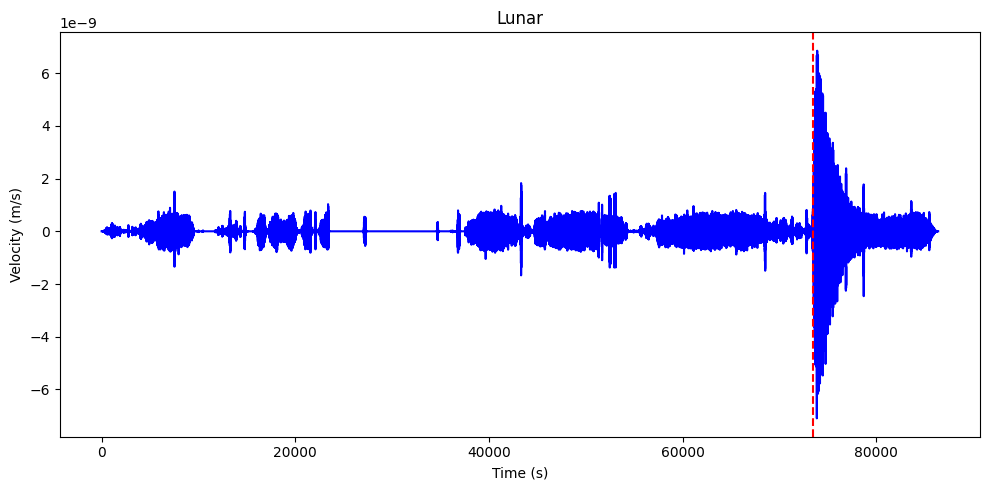

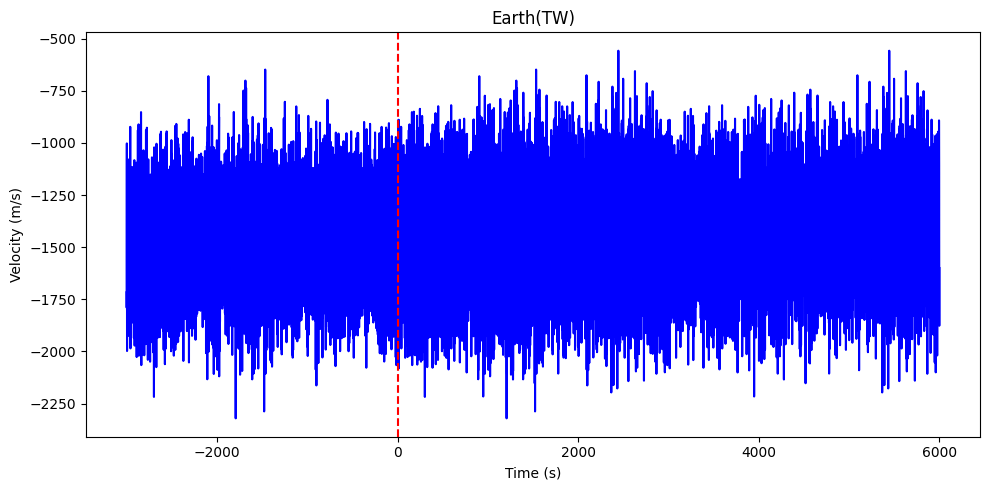

In [25]:
from obspy import read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

def plot_seismic_waveform(mseed_file, cat_file=None, center_event=False, custom_title="Seismic Waveform"):
    st = read(mseed_file)

    target_sampling_rate = 6.625

    for tr in st:
        tr.resample(target_sampling_rate)

    tr = st[0]

    if not center_event:
        if cat_file is None:
            raise ValueError("CSV file is not provided")
        cat = pd.read_csv(cat_file)
        mseed_filename = mseed_file.split('\\')[-1].replace('.mseed', '')

        row = cat[cat['filename'] == mseed_filename]
        if row.empty:
            raise ValueError(f"No matching data found in CSV for {mseed_filename}")

        arrival_time = datetime.strptime(row.iloc[0]['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')

        starttime = tr.stats.starttime.datetime
        event_time_relative = (arrival_time - starttime).total_seconds()

    times = np.linspace(0, len(tr.data) / tr.stats.sampling_rate, len(tr.data))

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(times, tr.data, 'b')

    if center_event:
        total_time = len(tr.data) / tr.stats.sampling_rate
        centered_times = np.linspace(-total_time / 2, total_time / 2, len(tr.data))
        event_time_centered = 0
        ax.plot(centered_times, tr.data, 'b')
        ax.axvline(event_time_centered, color='r', linestyle='--')
        ax.set_title(custom_title)
    else:
        ax.axvline(event_time_relative, color='r', linestyle='--')
        ax.set_title(custom_title)

    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Velocity (m/s)")

    plt.tight_layout()
    plt.show()

mseed_file_path = r'D:\NASA\space_apps_2024_seismic_detection\data\lunar\training\data\S12_GradeA\xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed'
cat_file_path = r'D:\NASA\space_apps_2024_seismic_detection\data\lunar\training\catalogs\apollo12_catalog_GradeA_final.csv'

plot_seismic_waveform(mseed_file_path, cat_file_path, custom_title="Lunar")

mseed_file_path_2 = r'C:\Users\Bryan\Downloads\pyweed\tw80\max\new\II.KAPI.10.BHZ_2024-10-04T13_22_44.258_2024-10-04T15_02_44.258.mseed'
plot_seismic_waveform(mseed_file_path_2, center_event=True, custom_title="Earth(TW)")


>2.Most of Earth's seismic data is significantly different from the lunar's.

![Screenshot 2024-10-05 183029.png](<attachment:Screenshot 2024-10-05 183029.png>)


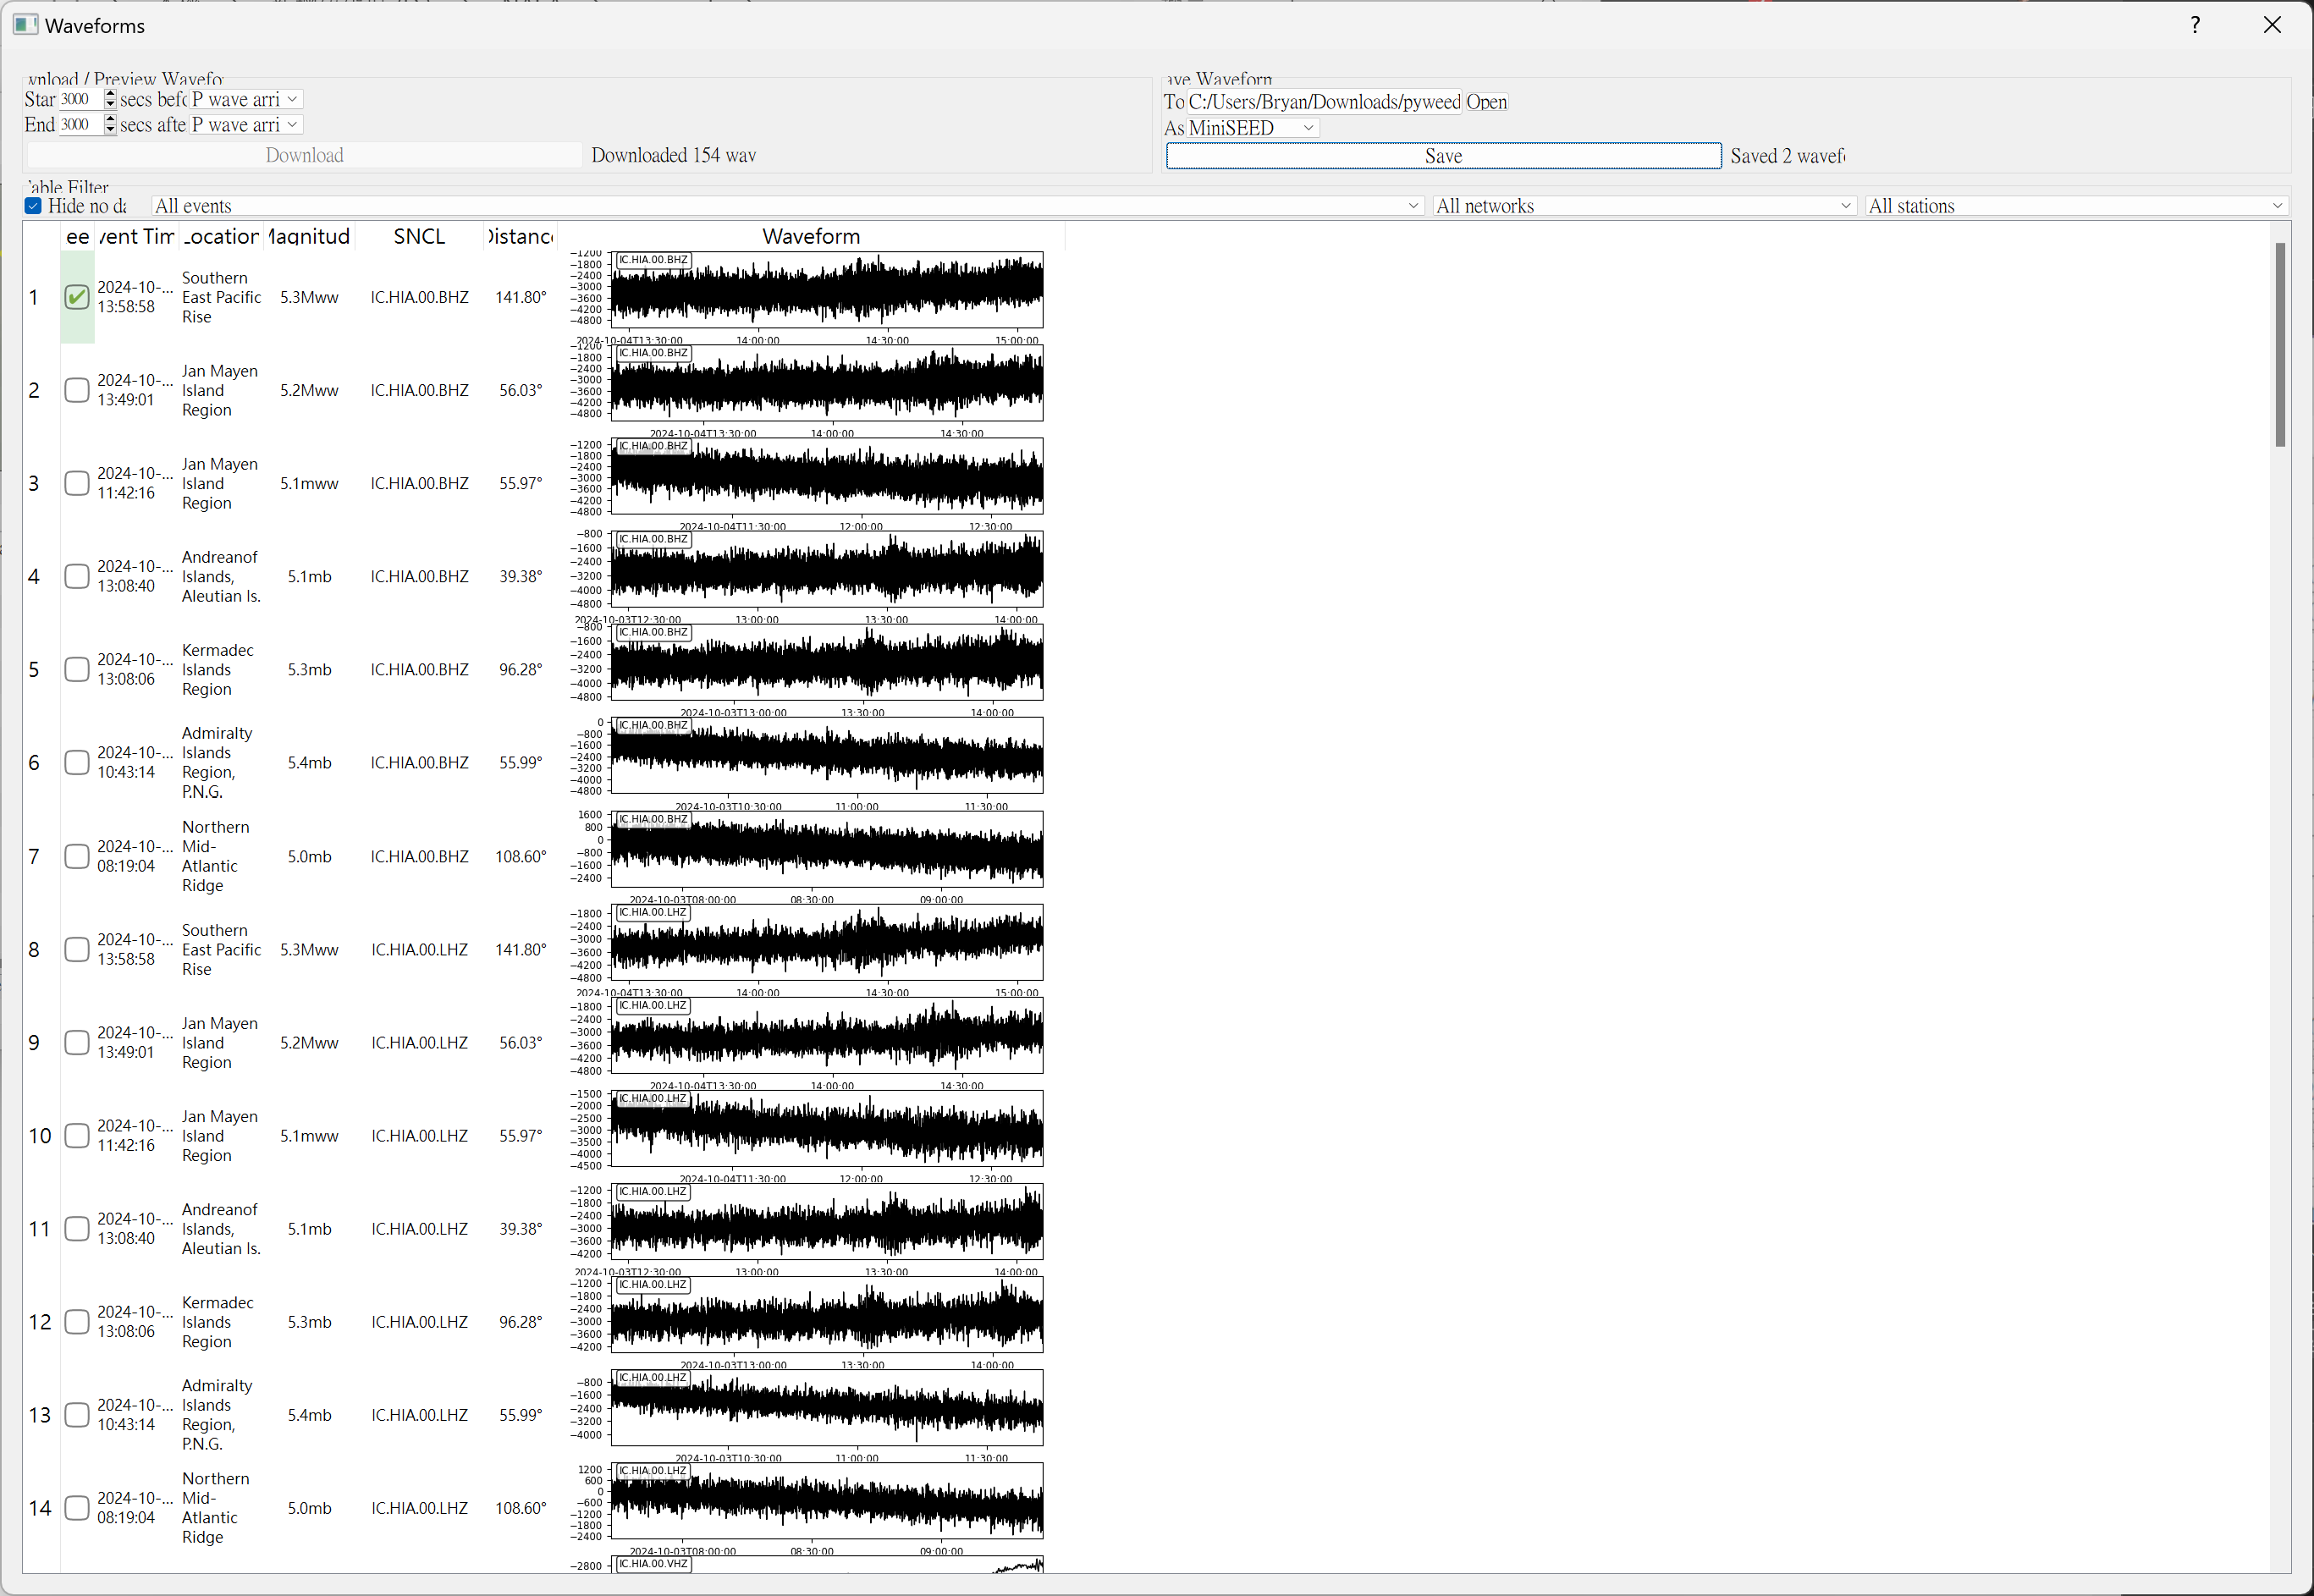

![Screenshot 2024-10-05 182950.png](<attachment:Screenshot 2024-10-05 182950.png>)

#### Earth Data Sources:
>PyWEED
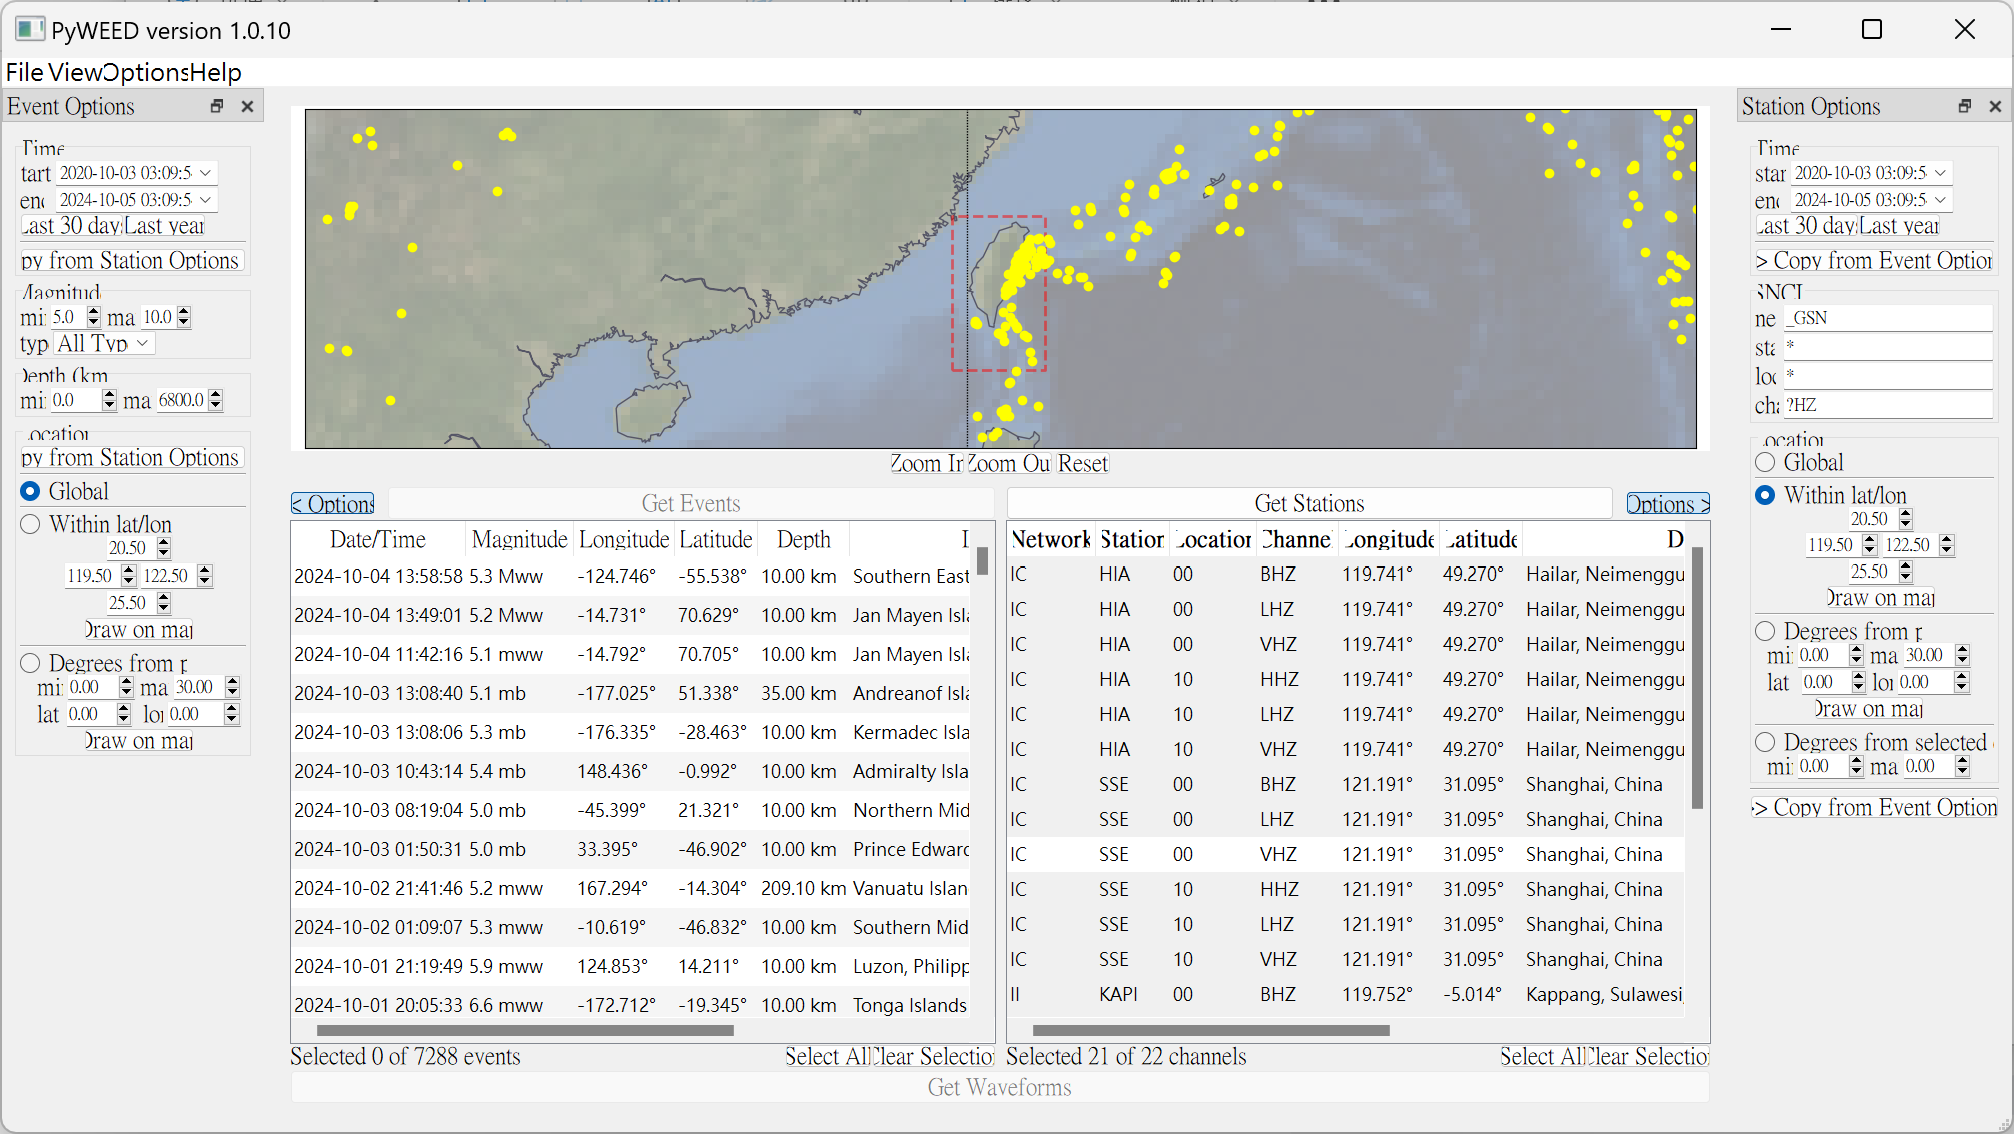

# Comparison of lunar Mars data sets

In [26]:
import pandas as pd
import os

def analyze_csv(file_path):
    date_cols = ['time_abs(%Y-%m-%dT%H:%M:%S.%f)']

    try:
        data = pd.read_csv(file_path, parse_dates=date_cols)
    except Exception as e:
        print(f"Error parsing dates: {e}")
        data = pd.read_csv(file_path)
    
    total_rows = data.shape[0]
    column_names = list(data.columns)
    
    print(f"Columns in CSV: {column_names}")
    print(f"Total Rows: {total_rows}")
    
    print("-" * 40)

csv_file_1 = 'D:\\NASA\\space_apps_2024_seismic_detection\\data\\lunar\\training\\catalogs\\apollo12_catalog_GradeA_final.csv'
csv_file_2 = 'D:\\NASA\\space_apps_2024_seismic_detection\\data\\mars\\training\\catalogs\\Mars_InSight_training_catalog_final.csv'

print("Analyzing lunar catalog")
analyze_csv(csv_file_1)
print("Analyzing Mars catalog")
analyze_csv(csv_file_2)


Analyzing lunar catalog
Columns in CSV: ['filename', 'time_abs(%Y-%m-%dT%H:%M:%S.%f)', 'time_rel(sec)', 'evid', 'mq_type']
Total Rows: 76
----------------------------------------
Analyzing Mars catalog
Columns in CSV: ['filename', 'time_abs(%Y-%m-%dT%H:%M:%S.%f)', 'time_rel(sec)', 'evid']
Total Rows: 2
----------------------------------------


>The amount of data on Mars is too small and the format of the data is different from that of the lunar, so it is not used. 